# <center>Analysis of Pokemon Data</center>
## <center>Katie Spiegel, Theo Rousset, Obinna Anadu, Harshit Garg</center>


###Background

Pokemon is a franchise that was created back in 1996 by Satoshi Tajiri. It is one of the biggest game franchises. There are over 1000 pokemon and the number will only continue to rise

In this universe, pokemon are similar to animals but they have very distinct properties about them. Some have very strong powers like the ability to manipulate time while others are no more different than a fish. Also in this world are pokemon trainers who raise their pokemon to do various things, whether it is to battle other pokemon trainers or help the trainers with their daily life.

In the main games you are a pokemon trainer whose main purpose is to become the pokemon champion, and you do this by fighting various trainers. You start out small and work your way up to the top. Each game has different pokemon and different regions for you to explore and conquer.

This analysis will be investigating all the characteristics that these pokemon have, like what typing they have, their base stats, and other things. The goal of this analysis is to try to identify what factors cause pokemons to have these certain stats, like what would cause one pokemon to have a higher hp stat than another pokemon, and so on.

Along with the information found out about stats and their correlations, this information could be used to find out how to better build a competitive Pokemon team. There are many competitions that go around the globe, and these have quite an audience.

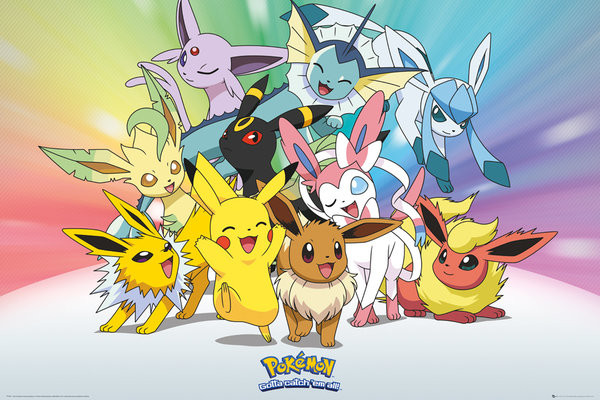







`https://cdn.europosters.eu/image/750/posters/pokemon-eevee-i32673.jpg`

## Data Collection


The first step is to extract the data. You don't need to download the dataset, we will be retrieving it from here: https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6#file-pokemon-csv.

This data will be covering pokemon from generation 1-6, so it will not be including all 1000+ but most of them are still shown here.



In [ ]:

#you will need the following imports
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from statsmodels.formula.api import ols

################
#data collecting
################


'''
The first part of the data lifecycle is data collecting. For this step we will be retrieving our data from a url
'''


#the source of our dataset
url = 'https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6#file-pokemon-csv'

#this is for retrieving the dataset
r = requests.get(url)
bs = BeautifulSoup(r.content, 'html.parser')
table = bs.find("table", class_ = "js-csv-data csv-data js-file-line-container")

#this is for turning the table into a dataframe
table_html = pd.read_html(str(table))
df = table_html[0]

print(df)



     Unnamed: 0    #                   Name   Type 1  Type 2  Total  HP  \
0           NaN    1              Bulbasaur    Grass  Poison    318  45   
1           NaN    2                Ivysaur    Grass  Poison    405  60   
2           NaN    3               Venusaur    Grass  Poison    525  80   
3           NaN    3  VenusaurMega Venusaur    Grass  Poison    625  80   
4           NaN    4             Charmander     Fire     NaN    309  39   
..          ...  ...                    ...      ...     ...    ...  ..   
795         NaN  719                Diancie     Rock   Fairy    600  50   
796         NaN  719    DiancieMega Diancie     Rock   Fairy    700  50   
797         NaN  720    HoopaHoopa Confined  Psychic   Ghost    600  80   
798         NaN  720     HoopaHoopa Unbound  Psychic    Dark    680  80   
799         NaN  721              Volcanion     Fire   Water    600  80   

     Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0        49       49       6

As you can see here, the data shown here is displaying all the properties of pokemon, such as their type, their stats, what generation they are from, etc.

Here's a rundown on what the columns mean

"#" ➡ This column refers to a pokemon’s pokedex number, pokemons are generally assigned in order of discovery. Sometimes the pokedex number can repeat which means that the pokemon has multiple forms at that stage of evolution

Name ➡ This column is just the names of the pokemon, again the pokemon names here can repeat because some pokemon can have multiple forms

Type ➡ This column refers to the general composition of the pokemon. Its typing is reflected by what it looks like and the moves that it can use.

Total ➡ This column refers to the the sum of the pokemons base stats, which are: HP, Attack, Defense, Special Attack, Special Defense, Speed

HP ➡ This stat determines the lifeforce of a pokemon

Attack ➡ This stat determines how hard a pokemon can hit something physically, like punching

Defense ➡ This stat determines how well a pokemon can take a physical hit

Special Attack ➡ This stat determines how well a pokemon can hit something non physically, like with psychic powers or fire breathing

Special Defense ➡ This stat determines how well a pokemon can take a special hit

Speed ➡ This stat determines how fast a pokemon is

Generation ➡ This column refers to the generation that the pokemon was discovered in. And generations are typically separated by regions, so you can also think of this column as different regions that the pokemon were discovered in.

Legendary ➡ This column refers to whether the pokemon is legendary or not. Legendary pokemon are special because they are very rare (mostly one of a kind) and have significance to the world of pokemon. They have great power like complete control over time, space, land, sea, the sky, etc.


##Data Cleaning


The next step of the analysis is to clean the data. This part will be handling any missing data found in the dataset and any other consistencies.

In [ ]:
##############
#data cleaning
##############

'''
The second part of the data lifecycle is data cleaning. In this part of the step we will be cleaning up any loose ends in our
dataset. For this we will do a couple of things. We will merge columns, clean any missing, and drop columns when necesary
'''


#if you have noticed there is a strange column at the front of the dataset, i don't know what it really means but we will be dropping it
df = df.drop('Unnamed: 0', axis=1)

#next we will be dealing with the missing data
#we will use the fillna() method for filling NaN slots with empty string
#this is mainly for the type columns since not all the pokemon are dual typing
df = df.fillna('')

# making a plot with both type columns for later
df_og = df

#next we will be merging columns
#here i am combining type1 and type2 into one new column
for index, row in df.iterrows():
    df.at[index, 'Typing'] = df.at[index, 'Type 1']  + '/' + df.at[index, 'Type 2'] if df.at[index, 'Type 2'] != '' else df.at[index, 'Type 1']

    
    
#after creating the new typing column we have no use for the old ones anymore    
#dropping the old type columns
df = df.drop('Type 1', axis=1)
df = df.drop('Type 2', axis=1)






print(df)
    

       #                   Name  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0      1              Bulbasaur    318  45      49       49       65       65   
1      2                Ivysaur    405  60      62       63       80       80   
2      3               Venusaur    525  80      82       83      100      100   
3      3  VenusaurMega Venusaur    625  80     100      123      122      120   
4      4             Charmander    309  39      52       43       60       50   
..   ...                    ...    ...  ..     ...      ...      ...      ...   
795  719                Diancie    600  50     100      150      100      150   
796  719    DiancieMega Diancie    700  50     160      110      160      110   
797  720    HoopaHoopa Confined    600  80     110       60      150      130   
798  720     HoopaHoopa Unbound    680  80     160       60      170      130   
799  721              Volcanion    600  80     110      120      130       90   

     Speed  Generation  Leg

## Data Visualization and Analysis

Text(0, 0.5, 'Total Stats')

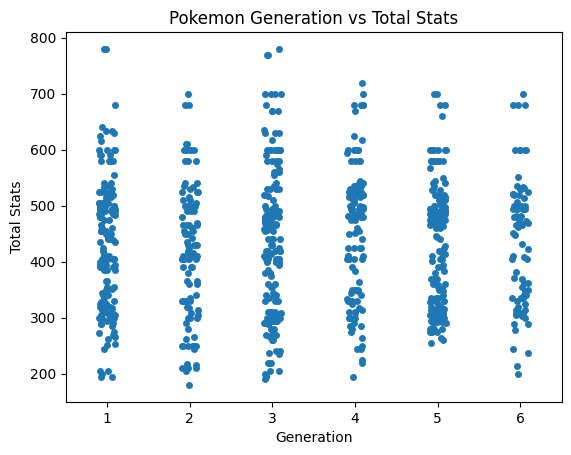

In [ ]:
# let's look at pokemon generations vs total stats
# pokemon generations correspond to groups of pokemon games that were released around the same time

sns.stripplot(x = "Generation", y = "Total", data = df)
plt.title("Pokemon Generation vs Total Stats")
plt.xlabel("Generation")
plt.ylabel("Total Stats")

Overall, it looks like generation does not have a large impact on the total stats for Pokemon. This is good, because new Pokemon should not be over or underpowered compared to the already existing choices. 

From this plot, some outliers can be noticed. Let's see if these Pokemon are marked legendary, which would mean they are rare and generally high powered. 

Text(0, 0.5, 'Total Stats')

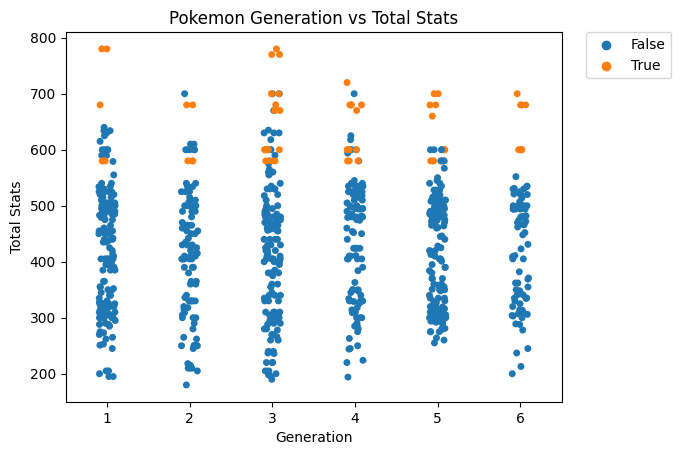

In [ ]:
sns.stripplot(x = "Generation", y = "Total", hue= "Legendary", data = df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Pokemon Generation vs Total Stats")
plt.xlabel("Generation")
plt.ylabel("Total Stats")

It looks like legendary Pokemon do account for many of the outliers! Let's next look at them by type.

Text(0, 0.5, 'Total Stats')

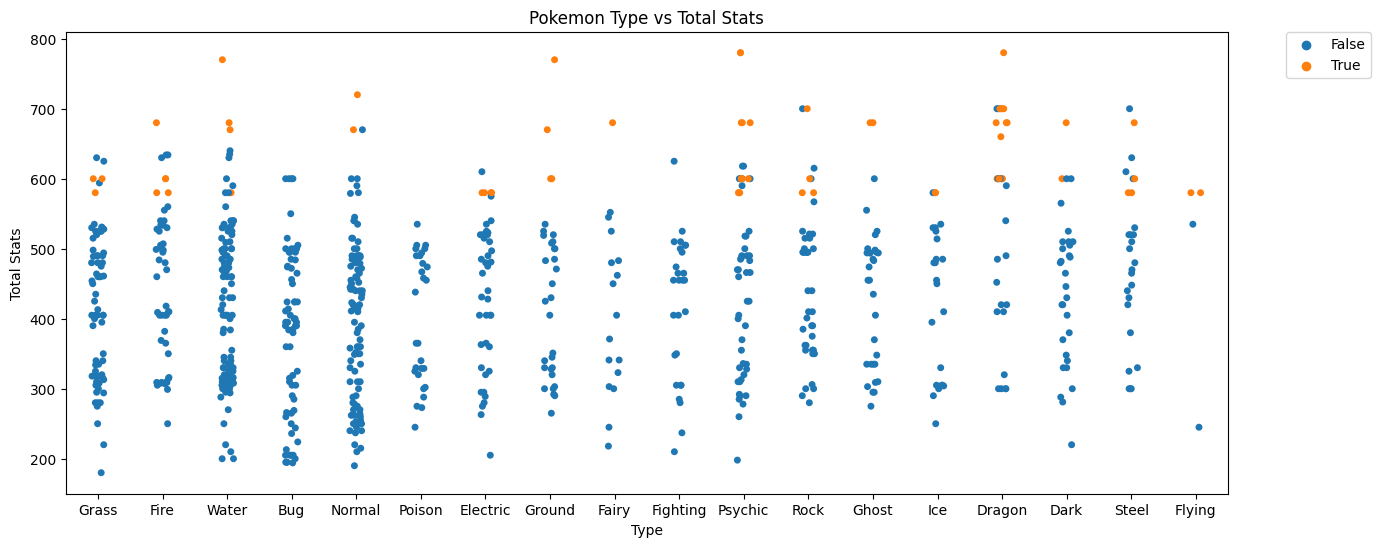

In [ ]:
plt.figure(figsize=(15,6))
sns.stripplot(x = "Type 1", y = "Total", data = df_og, hue="Legendary")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Pokemon Type vs Total Stats")
plt.xlabel("Type")
plt.ylabel("Total Stats")

From this plot, we can see types bug, poison, and fighting have no legendary Pokemon, and their total stat value doesn't break 650. Do these types have a lack of all stats? Or are there certain ones that drag them down? Also, does having a second type increase a Pokemon's overall stat value?

In [ ]:
# getting only the exclusively bug, poison, and fighting types. also adding dragon to be able to compare to a higher overall overage stat type

temp = df_og.loc[df_og['Type 1'].isin(['Poison','Bug', 'Fighting', 'Dragon'])]
mask = temp['Type 2'] == ''
temp = temp.loc[mask]
print(temp)

       #      Name    Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  \
13    10  Caterpie       Bug           195  45      30       35       20   
14    11   Metapod       Bug           205  50      20       55       25   
28    23     Ekans    Poison           288  35      60       44       40   
29    24     Arbok    Poison           438  60      85       69       65   
34    29  Nidoran♀    Poison           275  55      47       52       40   
..   ...       ...       ...    ...    ...  ..     ...      ...      ...   
733  665    Spewpa       Bug           213  45      22       60       27   
742  674   Pancham  Fighting           348  67      82       62       46   
774  704     Goomy    Dragon           300  45      50       35       55   
775  705   Sliggoo    Dragon           452  68      75       53       83   
776  706    Goodra    Dragon           600  90     100       70      110   

     Sp. Def  Speed  Generation  Legendary    Typing  
13        20     45           1 

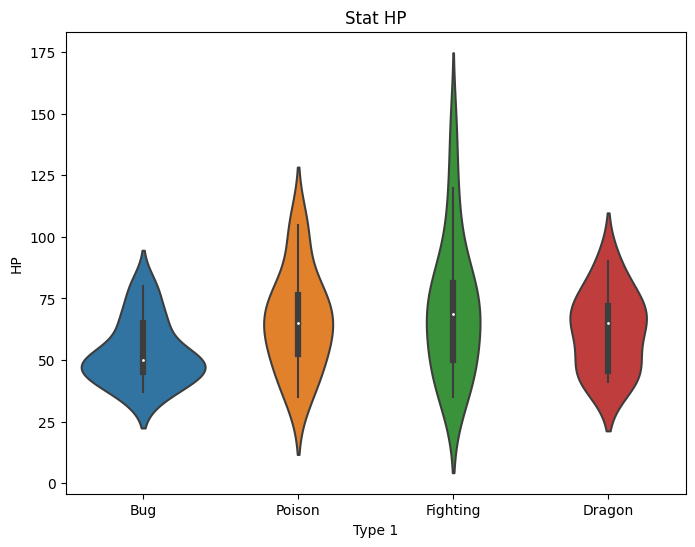

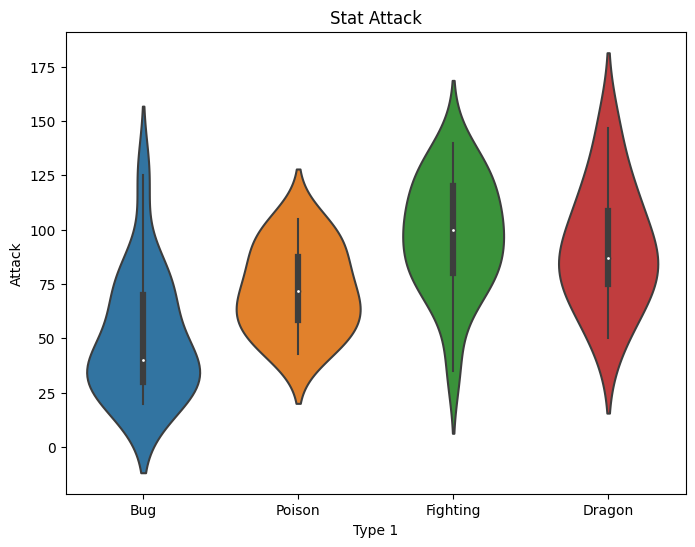

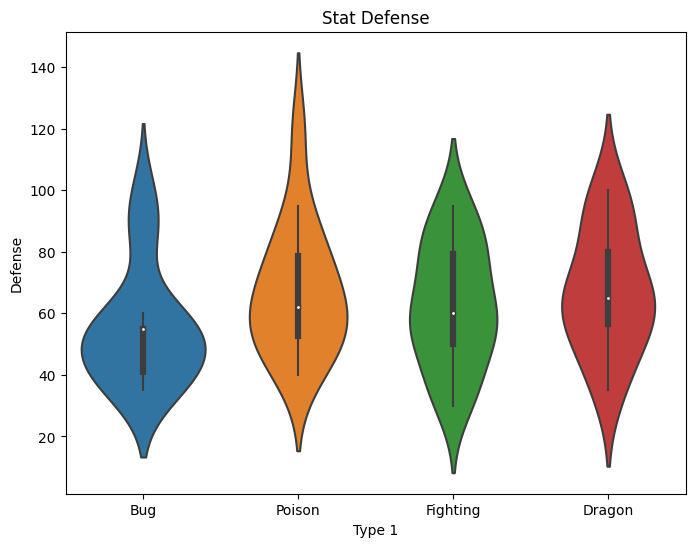

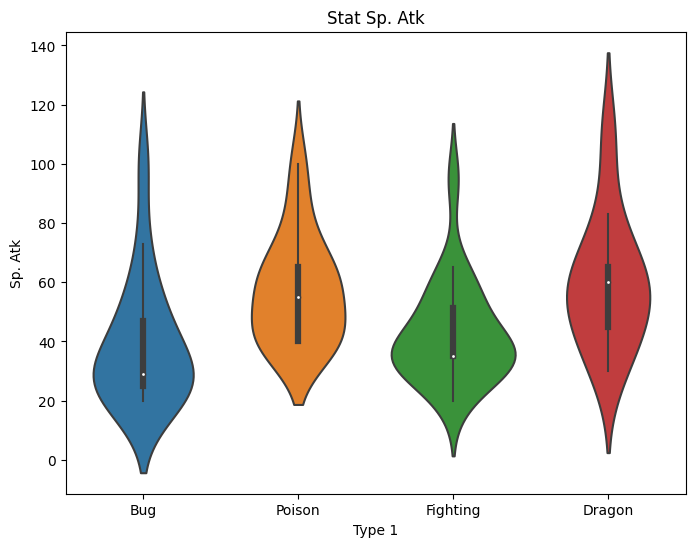

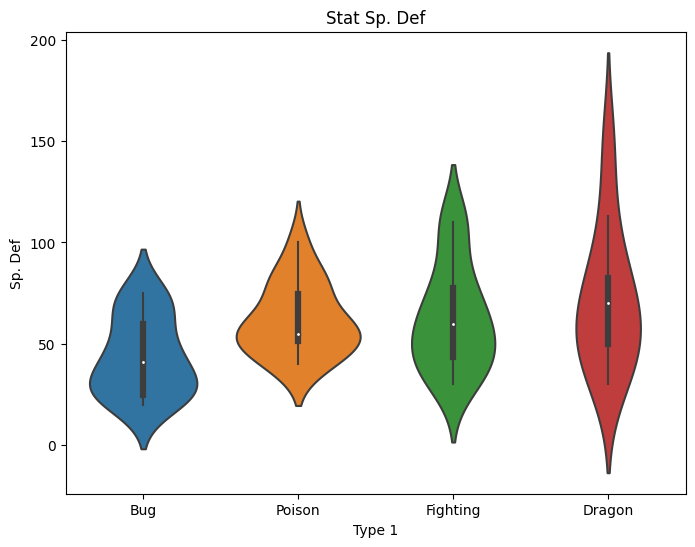

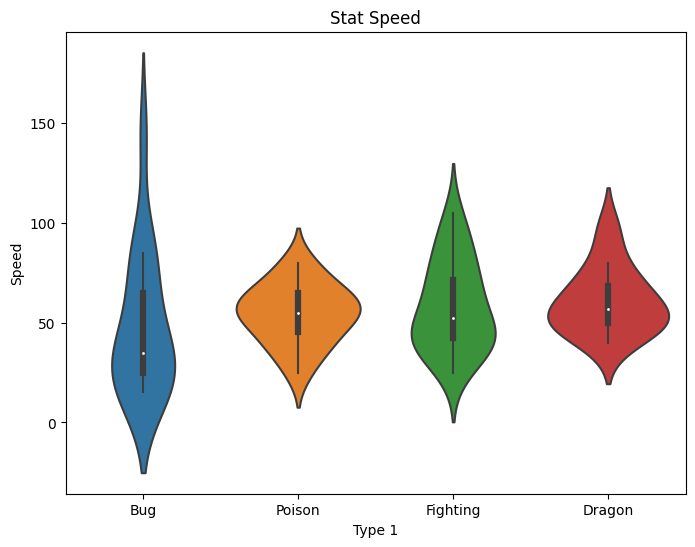

In [ ]:
# comparing each of their stats
categories = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for cat in categories:
  plt.figure(figsize = (8, 6))
  plt.title("Stat " + cat)
  plt.xlabel("Type")
  plt.ylabel(cat)
  sns.violinplot(x = 'Type 1', y = cat, data = temp)

To look at and compare spread, we used violin plots.

**HP:** Fighting comes out with the maximum HP of the 4 types, and has the highest median.

**Attack:** Dragon has the maximum, but Fighting has the highest median.

**Defense:** Dragon has the highest median. Poison has a very high outlier with a maximum defense value.

**Sp. Atk:** For special attack, Dragon has the highest median by a decent margin.

**Sp. Defense:** Dragon has a very high outlier here, and it still has the highest median.

**Speed:** Bug has another maxmimum, but Dragon has the highier median.

From these plots, it can be said that Fighting as a type just has a higher median in overall stats. This being said, Dragon types in the upper percentiles have quite a step up on all the other Pokemon types represented here. Dragon types also have a symmetric spread except for Speed. However, it is not as symmetric as the poison type.



Here, another dataframe will be created with true/false for second type.

In [ ]:
# creating a new dataframe with true/false for second type
temp2 = df_og
for index, row in temp2.iterrows():
    temp2.at[index, 'Type 2'] = True if temp2.at[index, 'Type 2'] != '' else False

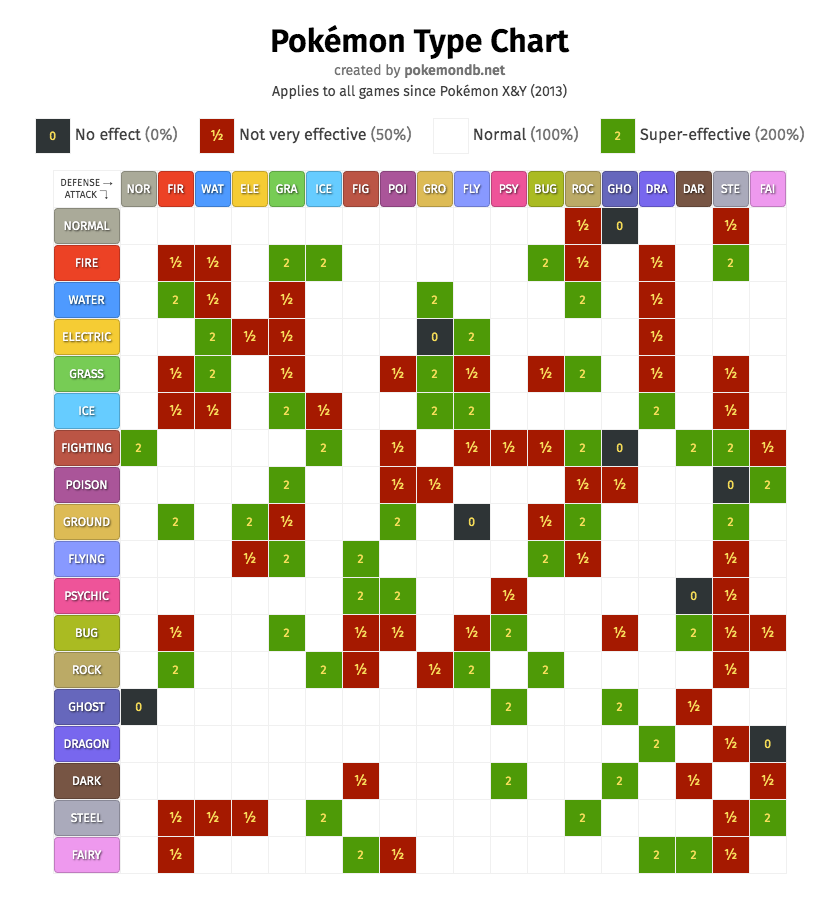

https://pokemondb.net/type

This chart shows the resistances and weaknesses of certain types of Pokemon.

Electric and Normal types both only have one weakness. I'm going to include Steel types too, since they have the most resistances, at 10, by a large margin. Fire and Poison have the next highest amount of resistances, by five.

We will also exclusively use data from Pokemon with these types and no second type, to better represent them.

In [ ]:
# getting only the exclusively Electric, Normal, and Steel to be able to compare to a higher overall overage stat type
Ens = temp2.loc[df_og['Type 1'].isin(['Electric','Normal', 'Steel'])]
mask = Ens['Type 2'] == False
Ens = Ens.loc[mask]
print(Ens)

       #        Name    Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  \
24    19     Rattata    Normal  False    253  30      56       35       25   
25    20    Raticate    Normal  False    413  55      81       60       50   
30    25     Pikachu  Electric  False    320  35      55       40       50   
31    26      Raichu  Electric  False    485  60      90       55       90   
57    52      Meowth    Normal  False    290  40      45       35       40   
..   ...         ...       ...    ...    ...  ..     ...      ...      ...   
664  603   Eelektrik  Electric  False    405  65      85       70       75   
665  604  Eelektross  Electric  False    515  85     115       80      105   
687  626  Bouffalant    Normal  False    490  95     110       95       40   
727  659    Bunnelby    Normal  False    237  38      36       38       32   
744  676     Furfrou    Normal  False    472  75      80       60       65   

     Sp. Def  Speed  Generation  Legendary    Typing  
24      

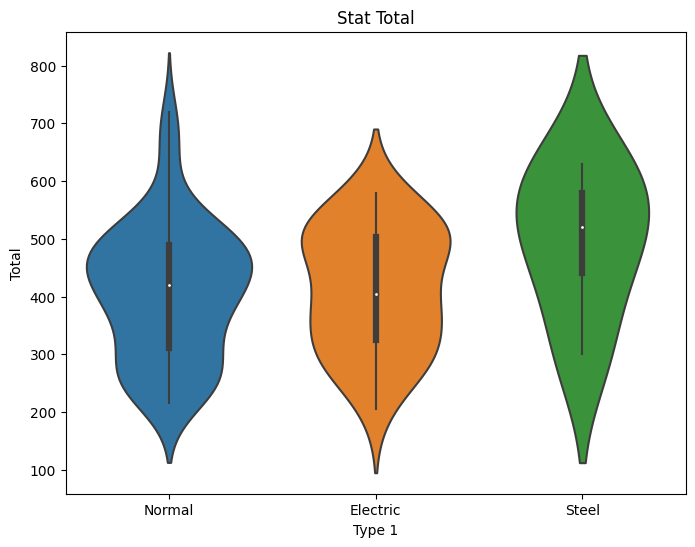

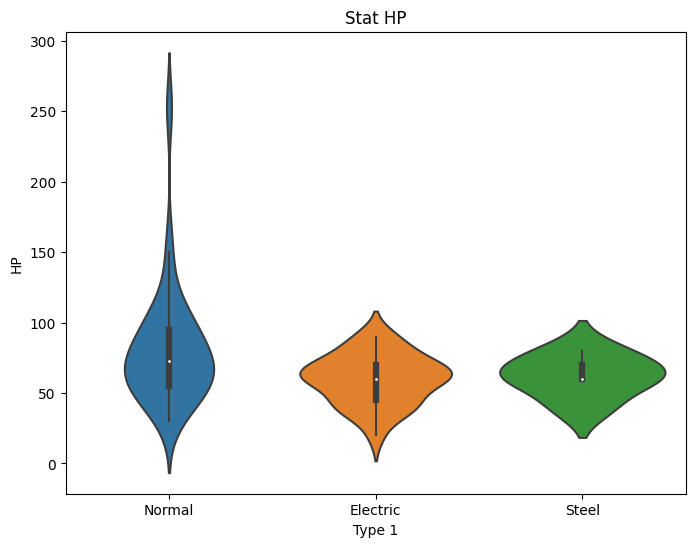

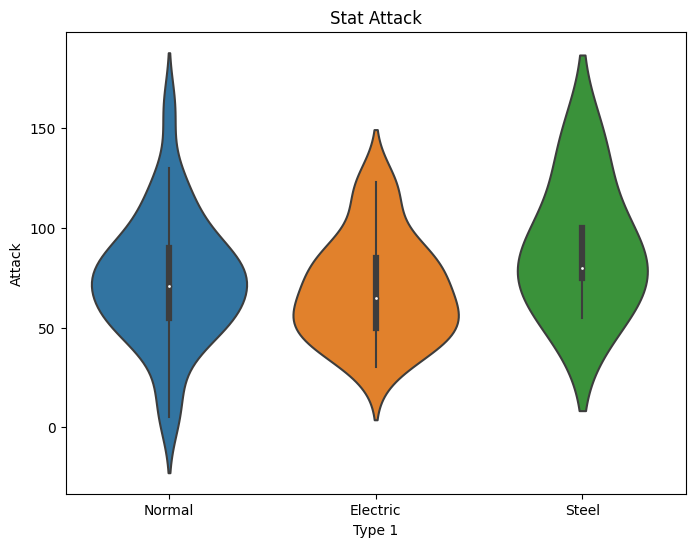

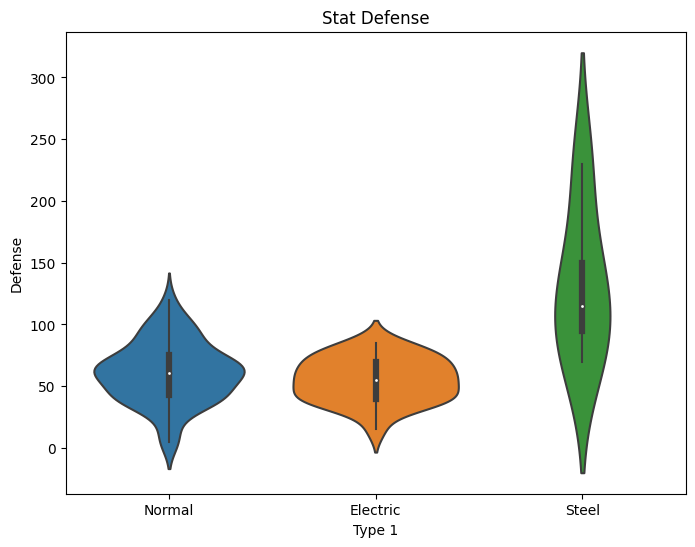

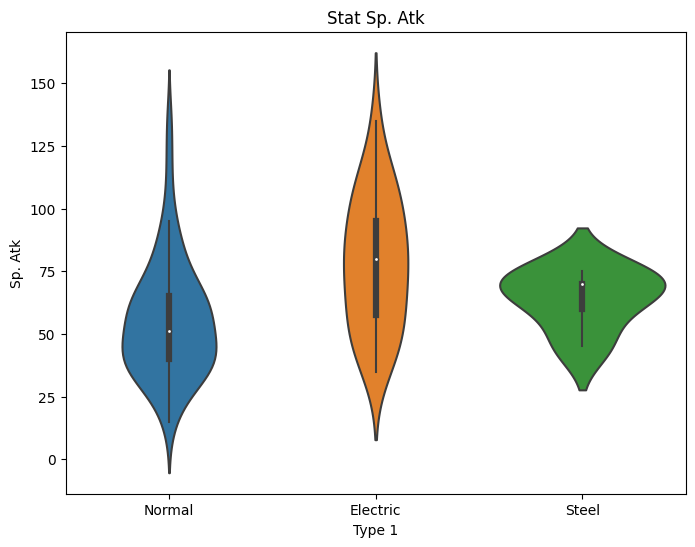

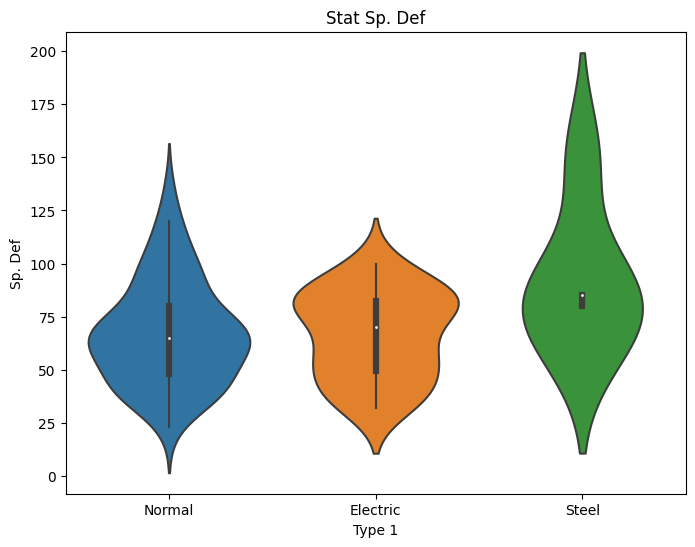

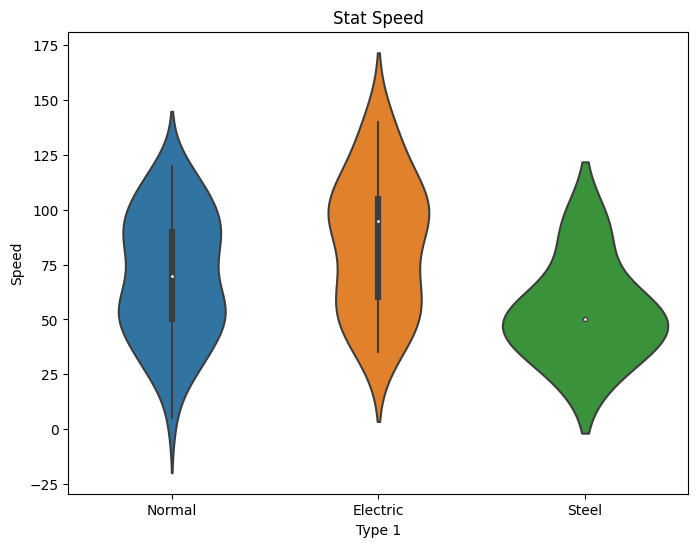

In [ ]:
# comparing each of their stats

categories = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for cat in categories:
  plt.figure(figsize = (8, 6))
  plt.title("Stat " + cat)
  plt.xlabel("Type")
  plt.ylabel(cat)
  sns.violinplot(x = Ens['Type 1'], y = cat, data = Ens)

To look at and compare spread, we used violin plots.

**HP:** Normal has the highest health by far (probably Chancey), and has the highest median.

**Attack:** Normal and Steel seem to roughly share the maximum, but Steel has the highest median.

**Defense:** Steel has the highest median and Steel has a very high outlier with a maximum defense value.

**Sp. Atk:** For special attack, Electric has the highest median by a decent margin, but it's max is not much higher than Normal. Electric also has a nice symmetrical spread.

**Sp. Defense:** Steel has a very high outlier here, and it still has the highest median. Even with the high outlier, 50% of Steel pokemon are within 15 of the median.

**Speed:** Electric greatly out-classes the other 2 here in both maximum and median, but Dragon has the highier median. Steel types seem to typically have a Speed of just about 50.

From these plots, it can be said that Steel as a type just has a higher median in overall stats. However, Steel's stats seem to be weighted heavier for defensive Stats, while HP, Speed, and Special Attack are much lower and more highly condensed in the graph.

Now, let's look at how having a second type affects stats.


       #                   Name   Type 1 Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass   True    318  45      49       49   
1      2                Ivysaur    Grass   True    405  60      62       63   
2      3               Venusaur    Grass   True    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass   True    625  80     100      123   
4      4             Charmander     Fire  False    309  39      52       43   
..   ...                    ...      ...    ...    ...  ..     ...      ...   
795  719                Diancie     Rock   True    600  50     100      150   
796  719    DiancieMega Diancie     Rock   True    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   True    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic   True    680  80     160       60   
799  721              Volcanion     Fire   True    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary

Text(0, 0.5, 'Total Stats')

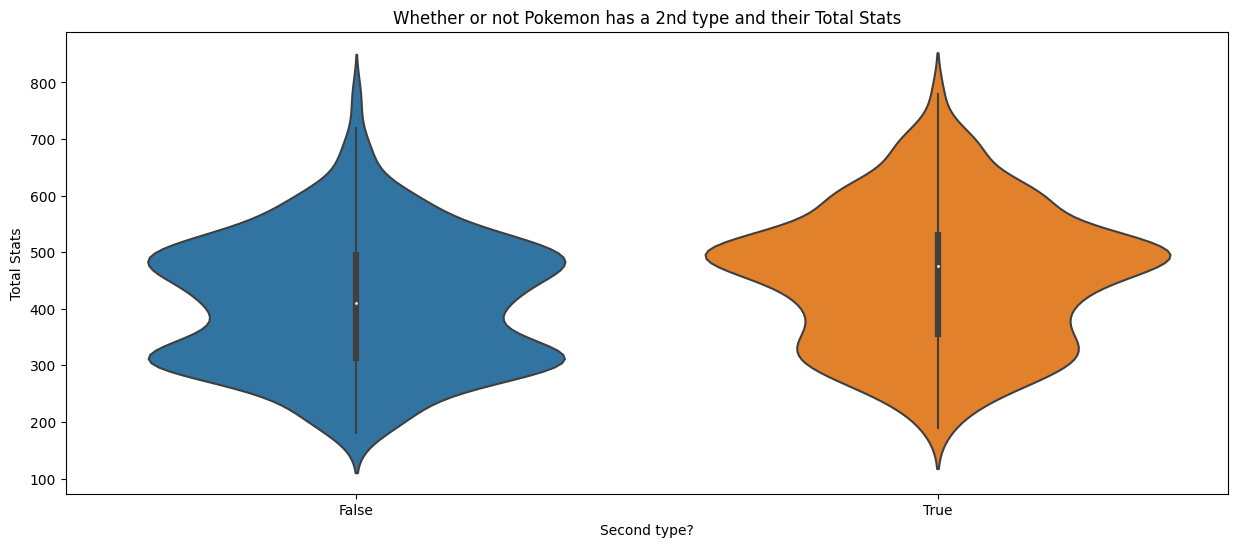

In [ ]:
print(temp2)
plt.figure(figsize = (15, 6))
sns.violinplot(x = "Type 2", y = "Total", data = temp2)
plt.title("Whether or not Pokemon has a 2nd type and their Total Stats")
plt.xlabel("Second type?")
plt.ylabel("Total Stats")

Let's also see how many Pokemon are in each category.

In [ ]:
print("There are", temp2[temp2["Type 2"] == False].shape[0], "Pokemon that don't have a second type.")
print("There are", temp2[temp2["Type 2"] == True].shape[0], "Pokemon that do have a second type.")

There are 386 Pokemon that don't have a second type.
There are 414 Pokemon that do have a second type.


For the Pokemon that do have a second type, their overall stat median is higher than Pokemon that do not have a second type-- only by around 50, though. There's a good chance that this can be attributed to lower evolution Pokemon starting with one type, and later on, getting another type as they evolve.

## Model: Analysis, Hypothesis Testing, Machine Learning

Although there is not a conventional measure of time for this dataset, we can use Generation as a scale to look at time progression. We can also run regression analysis on the generation to get a general sense of trend. 


Text(0, 0.5, 'Total Stats')

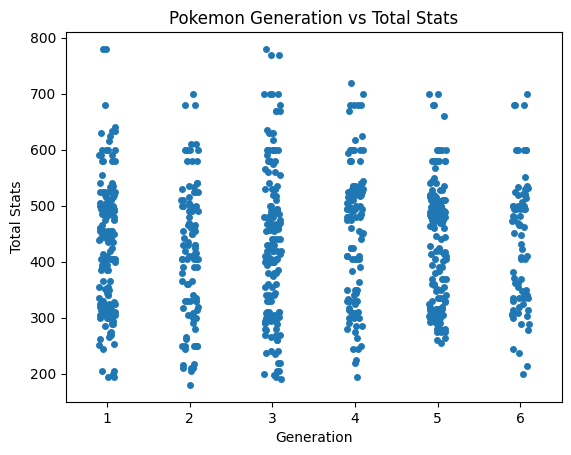

In [ ]:
sns.stripplot(x = "Generation", y = "Total", data = df)
plt.title("Pokemon Generation vs Total Stats")
plt.xlabel("Generation")
plt.ylabel("Total Stats")

The plot above is from earlier in the project, we will now fit a line of regression for the data.

In [ ]:
X = df["Generation"].values[:,np.newaxis]

y = df["Total"].values


reg = linear_model.LinearRegression()
reg.fit(X, y)

result = ols(formula="Total ~ Generation", data=df).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.873
Date:                Sat, 13 May 2023   Prob (F-statistic):              0.172
Time:                        01:53:37   Log-Likelihood:                -4963.5
No. Observations:                 800   AIC:                             9931.
Df Residuals:                     798   BIC:                             9940.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    423.4898      9.486     44.643      0.0

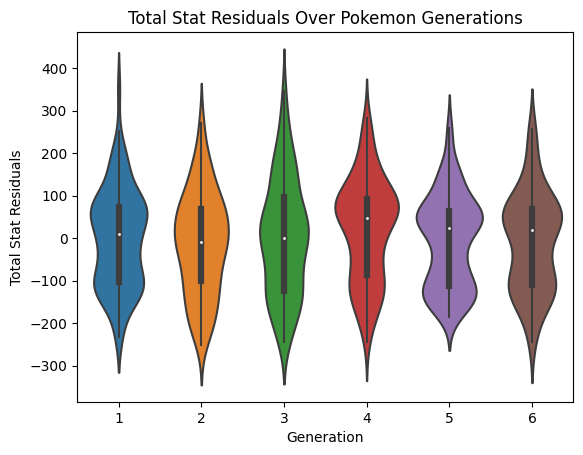

In [ ]:
y_predicted = reg.predict(X)
res = y - y_predicted

sns.violinplot(x = "Generation", y = res, data = df)
plt.title("Total Stat Residuals Over Pokemon Generations")
plt.xlabel("Generation")
plt.ylabel("Total Stat Residuals")
plt.show()

*This violin plot shows the residuals for the total Pokemon statistic residuals vs Pokemon Generation.* 

The plot is generally centered around 0.

<Axes: title={'center': 'Total Stats vs Pokemon Generation'}, xlabel='Generation', ylabel='Total'>

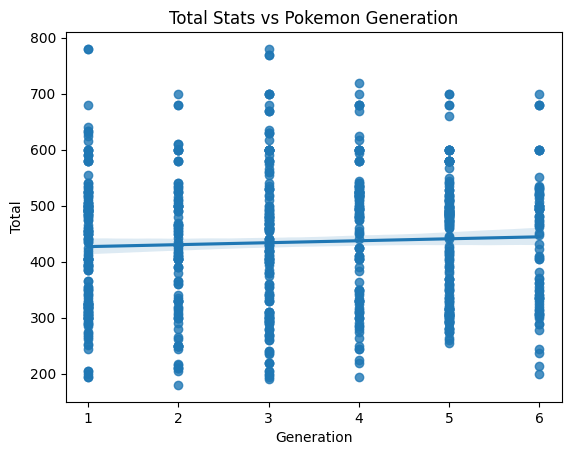

In [ ]:
plt.title("Total Stats vs Pokemon Generation")
plt.xlabel("Generation")
plt.ylabel("Total Stats")
sns.regplot(x = "Generation", y = "Total", data = df)

As expected, our line of best fit is only very slightly tilted. Total stats for Pokemon increase by 3.4938 per generation according to the regression model Co-Efficient. the p-value for this test is .172.

We can also predict the HP of a pokemon given the other characteristics like attack, defense, special attack, special defense, and speed so let's test if HP being dependent on those other factors is statistically significant.

Here let's create a hypothesis an perform a p value test in accordance to the 95% confidence threshold which means alpha is .05

H-Null: HP as dependent variable of other pokemon attributes is NOT statisitcally significant. 

H-Alternative: HP as dependent variable of other pokemon attributes IS statisitcally significant.

In [ ]:
import statsmodels.api as sm
results = ols(formula="HP ~ Attack + Defense + Q(\"Sp. Atk\") + Q(\"Sp. Def\") + Speed", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     HP   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     60.46
Date:                Sat, 13 May 2023   Prob (F-statistic):           2.08e-53
Time:                        01:53:39   Log-Likelihood:                -3597.6
No. Observations:                 800   AIC:                             7207.
Df Residuals:                     794   BIC:                             7235.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       31.4832      2.829     11.127   

Given our analysis of HP on Attack, Speed, Special Attack, Special Defense, and Defense. We can gather that our P-values are 0.0, 0.0, 0.01, 0.0, 0.0, 0.003 respectively.

Furthmore we can further explore the regression individually per dependent variable and find how the HP changes per regressor.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


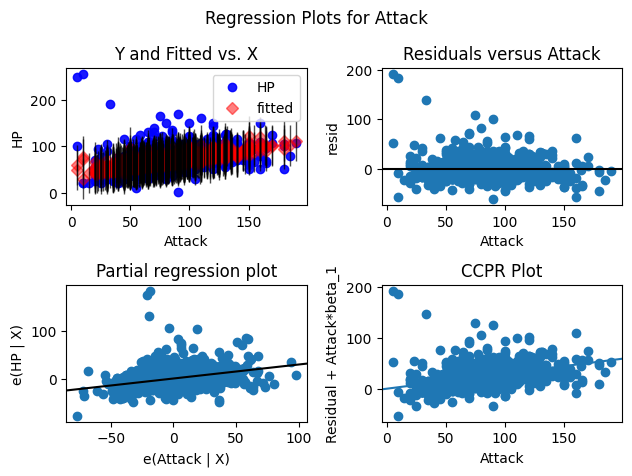

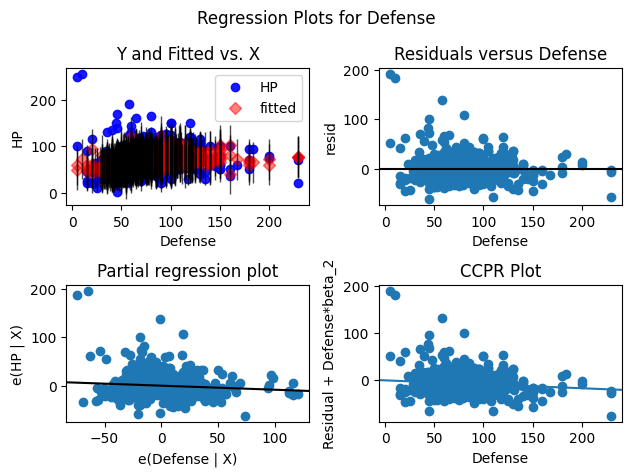

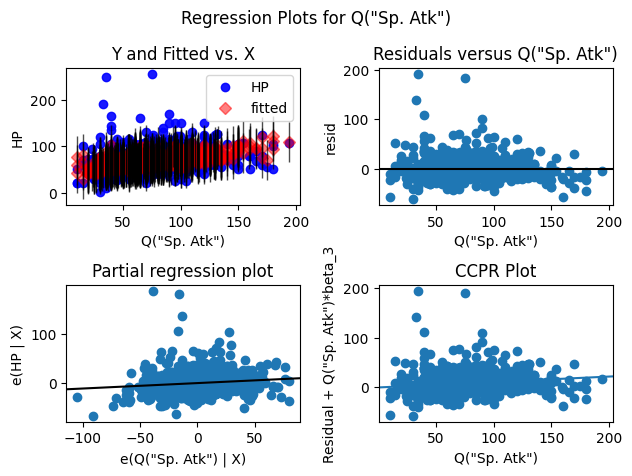

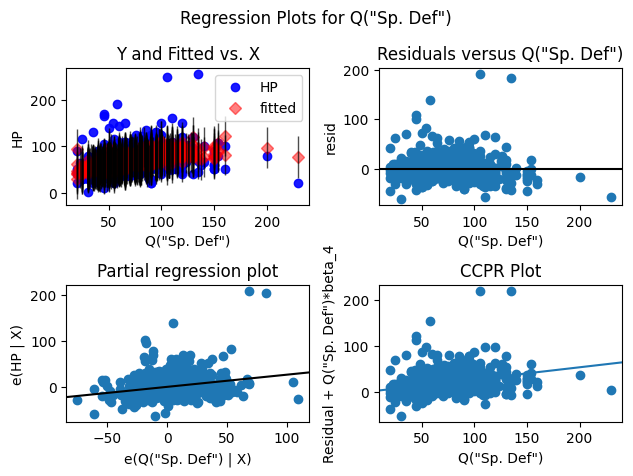

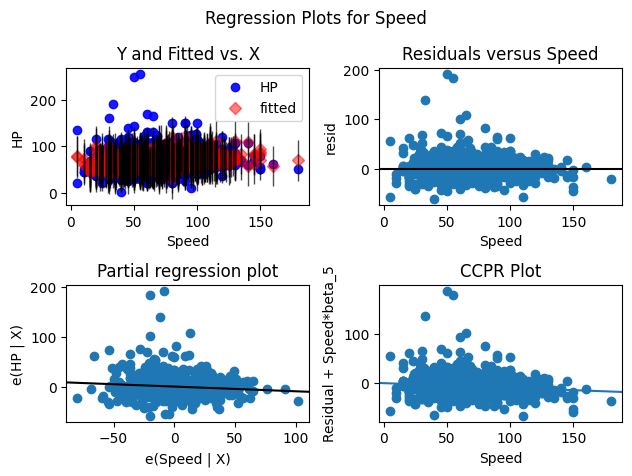

In [ ]:
fig = sm.graphics.plot_regress_exog(results, "Attack")
fig.tight_layout(pad=1.0)
fig = sm.graphics.plot_regress_exog(results, "Defense")
fig.tight_layout(pad=1.0)
fig = sm.graphics.plot_regress_exog(results, "Q(\"Sp. Atk\")")
fig.tight_layout(pad=1.0)
fig = sm.graphics.plot_regress_exog(results, "Q(\"Sp. Def\")")
fig.tight_layout(pad=1.0)
fig = sm.graphics.plot_regress_exog(results, "Speed")
fig.tight_layout(pad=1.0)

Moreover we can cross reference our assumptions above with adittional regression and residual plots.
I want to test:

H-Null: Speed is correlated to attack NOT in a statistically significant way

H-Alternative: Speed is correlated to attack in a statistically significant way

                            OLS Regression Results                            
Dep. Variable:                  Speed   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     76.25
Date:                Sat, 13 May 2023   Prob (F-statistic):           2.70e-65
Time:                        01:53:44   Log-Likelihood:                -3673.3
No. Observations:                 800   AIC:                             7359.
Df Residuals:                     794   BIC:                             7387.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       34.8052      3.107     11.201   

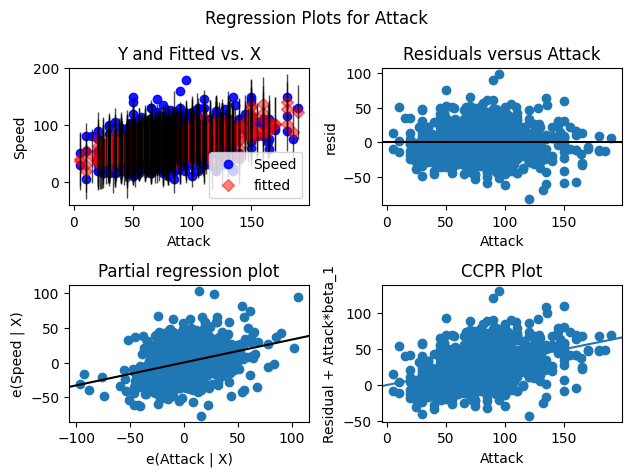

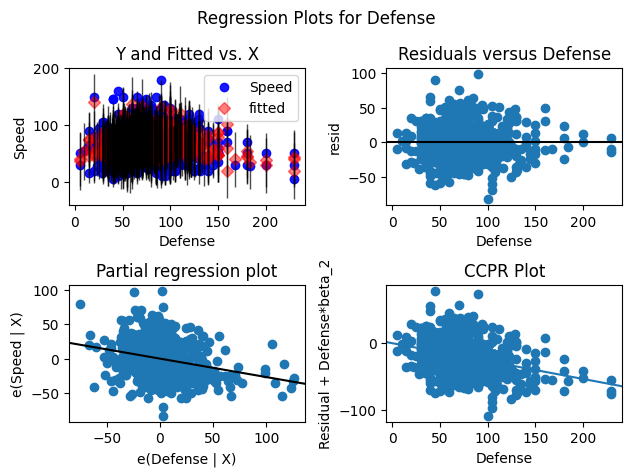

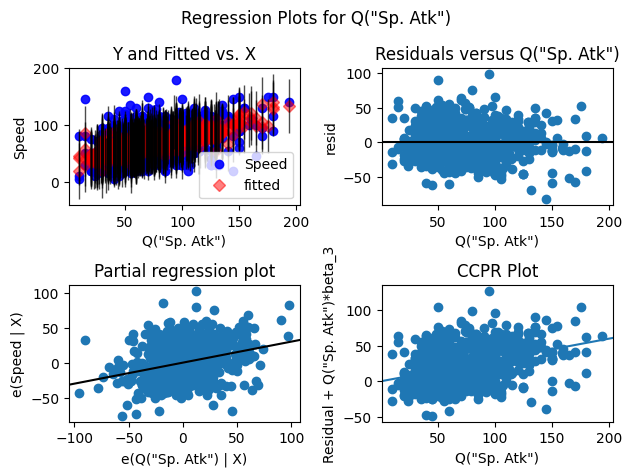

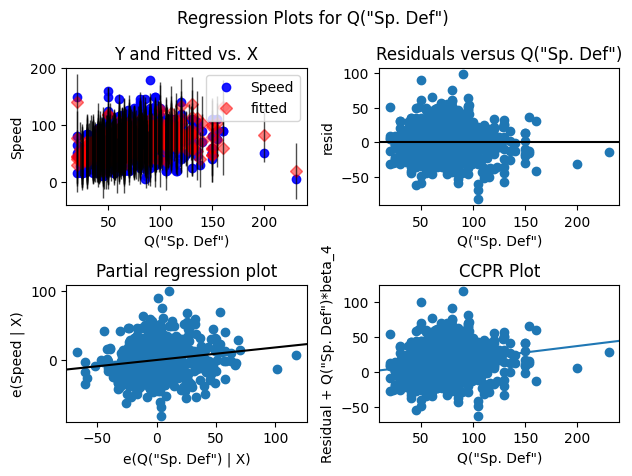

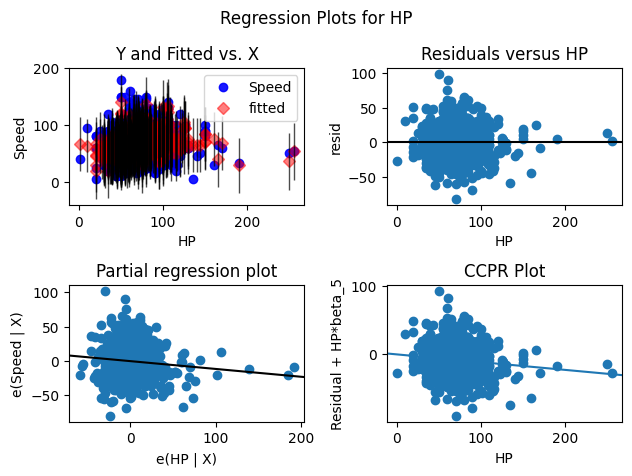

In [ ]:
#we shall fit a model with puts speed as dependent on the other traits that pokemon have 
results = ols(formula="Speed ~ Attack + Defense + Q(\"Sp. Atk\") + Q(\"Sp. Def\") + HP", data=df).fit()
print(results.summary())

#we will take a regressor and build 4 tables to support or negate our conclusions regarding the affects of each on Speed
fig = sm.graphics.plot_regress_exog(results, "Attack")
fig.tight_layout(pad=1.0)
fig = sm.graphics.plot_regress_exog(results, "Defense")
fig.tight_layout(pad=1.0)
fig = sm.graphics.plot_regress_exog(results, "Q(\"Sp. Atk\")")
fig.tight_layout(pad=1.0)
fig = sm.graphics.plot_regress_exog(results, "Q(\"Sp. Def\")")
fig.tight_layout(pad=1.0)
fig = sm.graphics.plot_regress_exog(results, "HP")
fig.tight_layout(pad=1.0)

P-value is under 0.05, so the null-hypothesis is accepted.

On top of the ML work in fitting data and ensuring we are aware of independence/dependence among attributes, I want to leverage SKLearn to perform a classification on detecting which pokemon is a set of attributes describing.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


feature_names = ["Speed", "Attack", "Defense", "Sp. Atk", "Sp. Def", "HP"]
# Assign values to the X and y variables:
X = df[feature_names]
y = df["Name"] 

# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

# Print results: 
print(classification_report(y_test, y_predict, zero_division=1)) 

                           precision    recall  f1-score   support

  AbomasnowMega Abomasnow       0.00      1.00      0.00       0.0
                     Abra       0.00      1.00      0.00       0.0
                    Absol       0.00      1.00      0.00       0.0
          AbsolMega Absol       0.00      1.00      0.00       0.0
                 Accelgor       1.00      0.00      0.00       1.0
                 Alakazam       0.00      1.00      0.00       0.0
    AlakazamMega Alakazam       0.00      1.00      0.00       0.0
                  Altaria       0.00      1.00      0.00       0.0
                   Amaura       1.00      0.00      0.00       1.0
                  Ambipom       0.00      1.00      0.00       0.0
                Amoonguss       0.00      1.00      0.00       0.0
                 Ampharos       0.00      1.00      0.00       0.0
                 Arcanine       0.00      1.00      0.00       0.0
                   Arceus       1.00      0.00      0.00     

## Interpretation: Insight & Policy Decision

**For this section, we use the results from the data analysis in an an attempt to draw conclusions, and how this should influence future decisions related to this data.**


1. Pokemon total stats increase over the generations, so it might be best to make a party out of the more recently released pokemon.

2. As many competitions have a limit to the number of legendaries used, trainers should pick their legendaries from these typings: water, ground, psychic, and dragon. Given the data, this doesn't accound for abilities and movesets, so it's best to still choose Pokemon to what fits your parties needs. However, it's probably still better to get choose a typing from these four for your legendaries, and round your team out with the other typings.

3. Since pokemon with two types tend to have higher overall stats, those should be prioritized in a party. These Pokemon tend to have a more diverse moveset too.

4. Since Steel Pokemon have so many resistances and high defense stats, they would go well on a team as a tank.

5. Dragons are a good choice for a team also, especially those in the higher percentiles of stats. Typically, when making a team, in order to be the very best there ever was, it's ideal to pick Pokemon in the higher percentiles anyway.

6. There is no correlation between Pokemons' HP stats and their other stats, and the same goes for the Attack stat and Speed stat. So, Pokemon are gonna have to be chosen on a case-by-case basis based on whats needed.

In general, this data and analysis can help trainers better decide how to make their team. For those interested in Pokemon, it's cool just to see how the data plays out across these Pokemon. There certainly is more that could've been done here to reach even a deeper understanding. We could've gotten charts including movesets of Pokemon and their type-coverages, since being able to attack with the weaknesses of your oppenent is vital to competitive Pokemon play.

Hopefully, this tutorial was beneficially to seeing the process involved in being a data scientist, and how the steps are gone through.

Here are some links that can help one further understand data science and the processes involved:

Running Jupyter Notebook:
https://docs.jupyter.org/en/latest/running.html#running

Array Programming with Numpy: 
https://www.nature.com/articles/s41586-020-2649-2

Pandas Cheat sheet:
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Introduction to Hypothesis Testing:
https://www.sagepub.com/sites/default/files/upm-binaries/40007_Chapter8.pdf

Information about Statistical Significance:
https://hbr.org/2016/02/a-refresher-on-statistical-significance

Role of Machine Learning in Data Science: https://hevodata.com/learn/machine-learning-in-data-science-2/

Data Processing and its stages: https://www.talend.com/resources/what-is-data-processing/#:~:text=Data%20processing%20occurs%20when%20data,end%20product%2C%20or%20data%20output.



Resources to learn more about Pokemon along with the competitive scene:

Pokedex that includes movesets: https://pokemondb.net/pokedex

Pokemon Championships: https://www.pokemon.com/us/play-pokemon/pokemon-events/pokemon-tournaments/

Pokemon Team Builder to help with making a team: https://marriland.com/tools/team-builder/en/

History of Pokemon: https://bulbapedia.bulbagarden.net/wiki/History_of_Pok%C3%A9mon



P-value is under 0.05, so the null-hypothesis is accepted.